

### **Generalization**

The result of running the machine learning algorithm can be expressed as a
function $y(x)$ which takes a new digit image $x$ as input and that generates an output
vector $y$, encoded in the same way as the target vectors. The precise form of the
function $y(x)$ is determined during the training phase, also known as the learning
phase, on the basis of the training data. Once the model is trained it can then determine the identity of new digit images, which are said to comprise a test set. The
ability to categorize correctly new examples that differ from those used for training is known as generalization. In practical applications, the variability of the input
vectors will be such that the training data can comprise only a tiny fraction of all
possible input vectors, and so generalization is a central goal in Machine Learning.

*C. Bishop*




## Exercise: Generalization and Its Dependence on Training Data

The following experiment shows how generalization is influenced by factors such as the number of training data points and the variability in the data. We will train a simple machine learning model (linear regression) on datasets with varying sizes and noise levels, then evaluate its generalization ability on unseen test data.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Function to generate synthetic data with varying noise levels
def generate_data(n_samples, noise_level):
    X = 3 * np.random.rand(n_samples, 1) -1
    y = 4 + 0.2*X + np.random.randn(n_samples, 1) * noise_level
    return X, y

# Function to train and evaluate the model, and plot the results
# IMPLEMENT THIS
def evaluate_generalization(n_samples, noise_level):
   X, y = generate_data(n_samples, noise_level)
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   model = LinearRegression()
   model.fit(X_train, y_train)
   train_mse = mean_squared_error(y_train, model.predict(X_train))
   test_mse = mean_squared_error(y_test, model.predict(X_test))
   return train_mse, test_mse


# Experiment with different numbers of samples and noise levels
n_samples_list = [10, 20, 50, 100, 200]
noise_levels = [0.1, 1.0, 5.0]

results = {}
for n_samples in n_samples_list:
    for noise in noise_levels:
        train_mse, test_mse = evaluate_generalization(n_samples, noise)
        results[(n_samples, noise)] = (train_mse, test_mse)
        print(f"Samples: {n_samples}, Noise: {noise} -> Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")



Samples: 10, Noise: 0.1 -> Train MSE: 0.01, Test MSE: 0.01
Samples: 10, Noise: 1.0 -> Train MSE: 0.77, Test MSE: 0.35
Samples: 10, Noise: 5.0 -> Train MSE: 15.70, Test MSE: 47.89
Samples: 20, Noise: 0.1 -> Train MSE: 0.01, Test MSE: 0.02
Samples: 20, Noise: 1.0 -> Train MSE: 1.64, Test MSE: 0.62
Samples: 20, Noise: 5.0 -> Train MSE: 16.57, Test MSE: 4.74
Samples: 50, Noise: 0.1 -> Train MSE: 0.01, Test MSE: 0.01
Samples: 50, Noise: 1.0 -> Train MSE: 0.89, Test MSE: 0.37
Samples: 50, Noise: 5.0 -> Train MSE: 22.19, Test MSE: 15.14
Samples: 100, Noise: 0.1 -> Train MSE: 0.01, Test MSE: 0.01
Samples: 100, Noise: 1.0 -> Train MSE: 0.85, Test MSE: 0.81
Samples: 100, Noise: 5.0 -> Train MSE: 22.99, Test MSE: 42.95
Samples: 200, Noise: 0.1 -> Train MSE: 0.01, Test MSE: 0.01
Samples: 200, Noise: 1.0 -> Train MSE: 1.04, Test MSE: 0.78
Samples: 200, Noise: 5.0 -> Train MSE: 26.32, Test MSE: 31.01


Number of Samples:

With fewer samples, the model might not have enough data to learn a generalizable pattern, leading to overfitting or underfitting. As the number of samples increases, the model generally improves its ability to generalize.


Noise Level:

Higher noise levels introduce more variability in the data, making it harder for the model to distinguish the true underlying pattern from the noise. This can result in higher test MSE, indicating poorer generalization.



### **Overfitting in Supervised Learning**

(adapted from Murphy)

In supervised learning, the primary goal is to develop models that can accurately predict the labels of unseen data. These models are trained on a dataset with known inputs and corresponding labels, and the performance of the model is often measured by the misclassification rate on the training set. The misclassification rate, or zero-one loss, is a common way to assess how well the model is performing on the training data.

#### **Understanding the Zero-One Loss**

The **zero-one loss function** is defined as:

$$
l_{01}(y, {\hat y}) = I(y \neq \hat{y})
$$

where:
- $y$ is the true label,
- $\hat{y}$ is the predicted label,
- $I(e)$ is the binary indicator function that returns 1 if the condition $e$ is true, and 0 otherwise.

Thus, the zero-one loss counts the number of incorrect predictions made by the model. The overall loss, or the empirical risk on the training set, is the average of these individual losses:

$$
L(\alpha) = \frac{1}{N} \sum_{n=1}^{N} l_{01}(y_n, f(x_n; \alpha))
$$

Here, $f(x_n; \alpha)$ represents the model's prediction for the input $x_n$, parameterized by $\alpha$, and $N$ is the total number of training examples.

#### **Overfitting Defined**

**Overfitting** occurs when a model performs exceptionally well on the training data but fails to generalize to unseen data. This happens when the model becomes too complex, capturing not only the underlying patterns in the data but also the noise and outliers.

In essence, an overfitted model has memorized the training data rather than learning the true underlying distribution. As a result, while the model may have a very low misclassification rate on the training set, its performance on new, unseen data (e.g., a test set) is poor.

#### **Example: The Cost of Errors in Real-World Scenarios**

Overfitting can be particularly problematic in real-world applications where the cost of errors varies. Consider the scenario where we are foraging for Iris flowers in the wilderness. Suppose:
- Iris Setosa and Iris Versicolor are edible,
- Iris Virginica is poisonous.

In this case, incorrectly predicting a poisonous Iris Virginica as edible can be much more costly than mistaking an edible flower as poisonous. To model such situations, an asymmetric loss function can be used, which assigns different penalties to different types of errors. For example:

| True Label  | Predicted Label | Loss Value |
|-------------|-----------------|------------|
| Setosa      | Virginica        | High       |
| Virginica   | Setosa           | High       |
| Setosa      | Versicolor       | Low        |
| Versicolor  | Setosa           | Low        |

Here, the loss function penalizes the more dangerous misclassifications more heavily.

#### **Overfitting and Empirical Risk**

In the context of empirical risk minimization, overfitting results in a model that has minimized the loss on the training data but has not generalized well. The model has achieved low empirical risk (low training loss) but at the cost of high generalization error.

To avoid overfitting, it is important to balance the model's complexity with its ability to generalize. Regularization techniques, cross-validation, and careful feature selection are common strategies used to prevent overfitting and ensure that the model performs well not just on the training data but also on unseen data.


# Exercise: Overfitting in polynomial regression



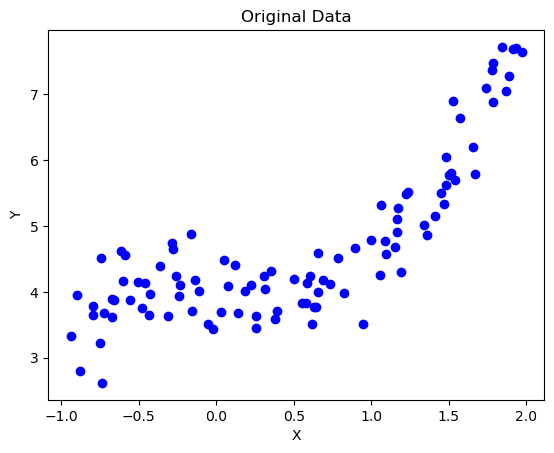

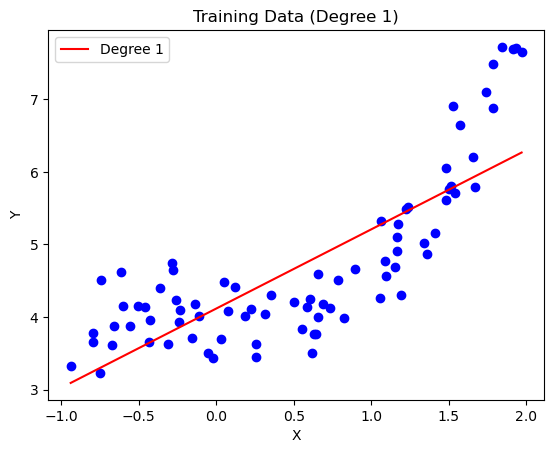

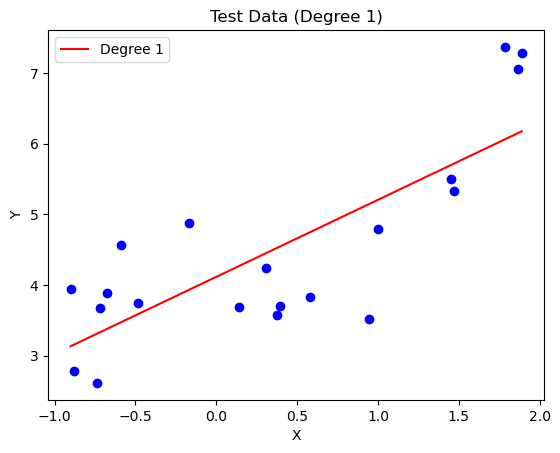

Degree 1: Train MSE = 0.49, Test MSE = 0.67


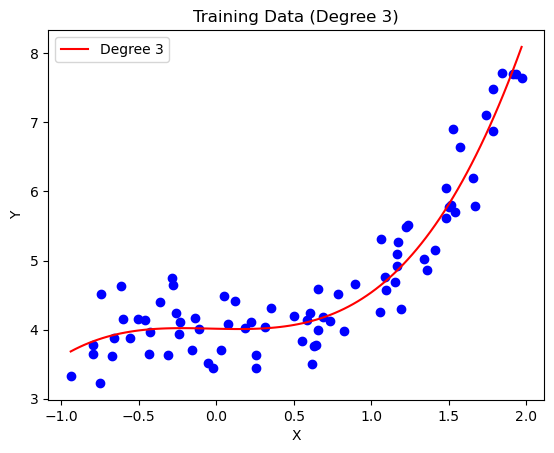

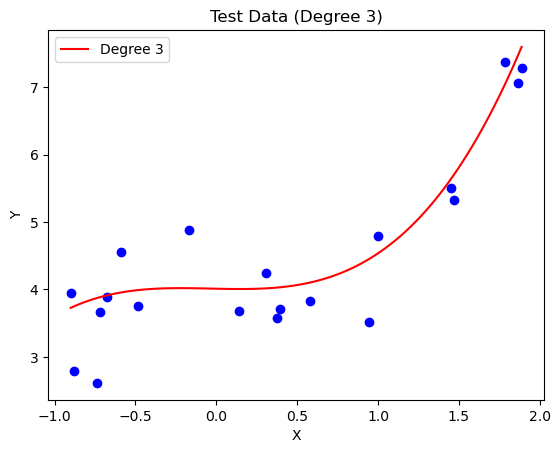

Degree 3: Train MSE = 0.14, Test MSE = 0.29


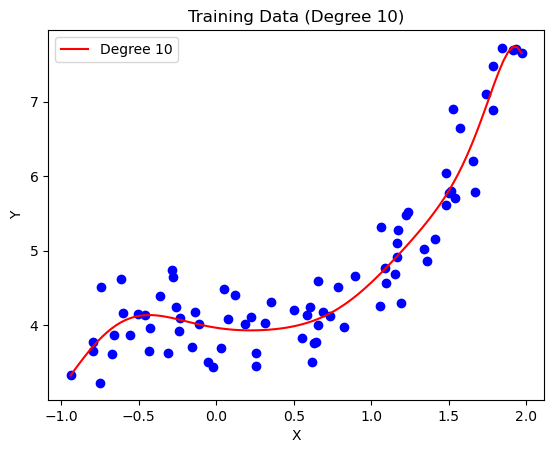

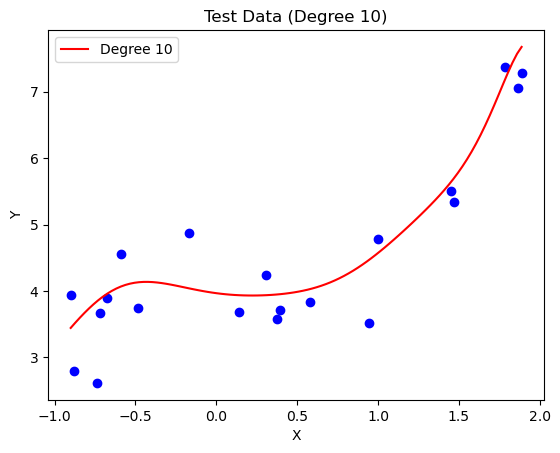

Degree 10: Train MSE = 0.13, Test MSE = 0.27


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X = 3 * np.random.rand(100, 1) -1
y = 4 + .5*X**3 + .4*np.random.randn(100, 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the original data
plt.scatter(X, y, color='blue')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Function to plot the model
def plot_model(X, y, model, degree, title):
    # Generate a grid of points for plotting the model's predictions
    X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    # Transform the grid points to include polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_grid_poly = poly_features.fit_transform(X_grid)

    # Make predictions
    y_pred = model.predict(X_grid_poly)

    # Plot the original data and the model's predictions
    plt.scatter(X, y, color='blue')
    plt.plot(X_grid, y_pred, color='red', label=f'Degree {degree}')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


# Train and plot models of increasing complexity
degrees = [1, 3, 10]  # Degrees of polynomial to fit
for degree in degrees:
    # Transform input data to include polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict and calculate mean squared error
    train_mse = mean_squared_error(y_train, model.predict(X_poly))
    test_mse = mean_squared_error(y_test, model.predict(poly_features.transform(X_test)))

    # Plot the model
    plot_model(X_train, y_train, model, degree, f"Training Data (Degree {degree})")
    plot_model(X_test, y_test, model, degree, f"Test Data (Degree {degree})")


    print(f"Degree {degree}: Train MSE = {train_mse:.2f}, Test MSE = {test_mse:.2f}")

